In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from time import sleep
from tqdm import tqdm
import re
from numpy import NaN

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
    }

dta = pd.read_csv('letterboxd\watched.csv')[['Name','Letterboxd URI']]


pttrn = [r'[0-9][.][0-9][0-9]', r'>[A-Za-z]+<', r'[0-9]+', r'>[A-Za-z,()]+<']


data = dict()

for dt in tqdm(dta.values):
  r = requests.get(dt[1], headers=header)
  site = BeautifulSoup(r.text,'html.parser')
  
  if 'Not Found' in str(site.title):
    continue

  try:
    meta_string = str(site.find_all('meta',{'name':'twitter:data2'})[0])
    avr_rating = re.findall(pttrn[0],meta_string)[0]
  except IndexError:
      avr_rating=NaN
  try:
    meta_string = str(site.find_all('meta',{'name':'twitter:data2'})[0])
    avr_rating = re.findall(pttrn[0],meta_string)[0]
  except IndexError:
      avr_rating=NaN

  try:
    raw_duration = [str(x) for x in site.find_all('p', {'class':'text-link text-footer'})][0]
    duration = re.findall(pttrn[2], raw_duration)[0]
  except:
    duration = NaN
  try:
    raw_genre = site.find_all('div', {'class':'text-sluglist capitalize'})[0]
    raw_str = ''.join([str(x) for x in raw_genre.find_all('a')])
    genre = [x[1:-1] for x in re.findall(pttrn[3], raw_str)] 
  except:
      genre=[]
  
  try:
    language = str(site.select('a[href^="/films/language"]')[0])
    lang = re.findall(pttrn[3], language)[0][1:-1]

  except:
    lang=NaN


  data[f'{dt[0]}'] = [avr_rating,duration,genre,lang]

print('Search completed!')

year = pd.read_csv(r'letterboxd\watched.csv')
rating = pd.read_csv(r'letterboxd\ratings.csv')

raw = pd.DataFrame(data).T
raw = raw.reset_index()
raw.columns = ['Name','Avr_Rating','Duration','Genre','Language']

clean = pd.merge(raw,rating, on='Name', how='outer')

clean.to_csv('data_movies.csv')

  3%|▎         | 15/476 [00:32<16:36,  2.16s/it]


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from time import sleep
from tqdm import tqdm
import re
from numpy import NaN

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
    }

dta = pd.read_csv('letterboxd\watched.csv')[['Name','Letterboxd URI']]


pttrn = [r'[0-9][.][0-9][0-9]', r'>[A-Za-z]+<', r'[0-9]+', r'>[A-Za-z,()]+<']


def extract_data(dta):
  data = dict()
  for dt in tqdm(dta.values):
    r = requests.get(dt[1], headers=header)
    site = BeautifulSoup(r.text,'html.parser')
    
    if 'Not Found' in str(site.title):
      print(f'{site.title} is not a valid url.')
      continue

    try:
      meta_string = str(site.find_all('meta',{'name':'twitter:data2'})[0])
      avr_rating = re.findall(pttrn[0],meta_string)[0]
    except IndexError:
        avr_rating=NaN

    try:
      raw_duration = [str(x) for x in site.find_all('p', {'class':'text-link text-footer'})][0]
      duration = re.findall(pttrn[1], raw_duration)[0]
    except:
      duration = NaN

    try:
      raw_genre = site.find_all('div', {'class':'text-sluglist capitalize'})[0]
      raw_str = ''.join([str(x) for x in raw_genre.find_all('a')])
      genre = [x[1:-1] for x in re.findall(pttrn[2], raw_str)] 
    except:
        genre=[]
    
    try:
      language = str(site.select('a[href^="/films/language"]')[0])
      lang = re.findall(pttrn[3], language)[0][1:-1]
    except:
      lang=NaN

    data[f'{dt[0]}'] = [avr_rating,duration,genre,lang]
  print('Search completed!')
  return data

year = pd.read_csv(r'letterboxd\watched.csv')
rating = pd.read_csv(r'letterboxd\ratings.csv')

raw = pd.DataFrame(data).T
raw = raw.reset_index()
raw.columns = ['Name','Avr_Rating','Duration','Genre','Language']

database = pd.merge(raw,rating, on='Name', how='outer')

database.to_csv('data_movies.csv')

  0%|          | 0/398 [00:00<?, ?it/s]

100%|██████████| 398/398 [11:54<00:00,  1.80s/it]

Search completed!


In [55]:
test = ['test',4,100,['test'],'language','2023-02-14','2000','https://boxd.it/43bI','3.5']

In [45]:
database.dropna()

,Name,Avr_Rating,Duration,Genre,Language,Date,Year,Letterboxd URI,Rating
0,About Time,3.96,123,"['Drama', 'Fantasy', 'Romance']",English,2023-02-14,2013.0,https://boxd.it/43bI,3.5
1,Harakiri,4.68,135,"['Drama', 'Action', 'History']",Japanese,2021-08-02,1962.0,https://boxd.it/1NTU,5.0
2,Joker,3.82,122,"['Crime', 'Thriller', 'Drama']",English,2022-08-22,2019.0,https://boxd.it/h4cS,3.5
3,Joan of Arc,3.25,145,"['Drama', 'History', 'War']",English,2021-11-09,1948.0,https://boxd.it/UsY,3.5
4,The Trial of Joan of Arc,3.75,62,"['Drama', 'History']",French,2022-05-29,1962.0,https://boxd.it/HGe,3.5
...,...,...,...,...,...,...,...,...,...
389,Licorice Pizza,3.61,133,"['Comedy', 'Drama']",English,2023-05-25,2021.0,https://boxd.it/qTKY,3.5
394,The Apartment,4.43,125,"['Comedy', 'Drama', 'Romance']",English,2023-06-06,1960.0,https://boxd.it/2aGE,5.0
395,It's Such a Beautiful Day,4.38,62,"['Comedy', 'Drama', 'Animation']",English,2023-06-19,2012.0,https://boxd.it/hCY2,2.5
396,Spider-Man: Across the Spider-Verse,4.51,140,"['Animation', 'Action', 'Adventure']",English,2023-06-22,2023.0,https://boxd.it/kSz4,3.0


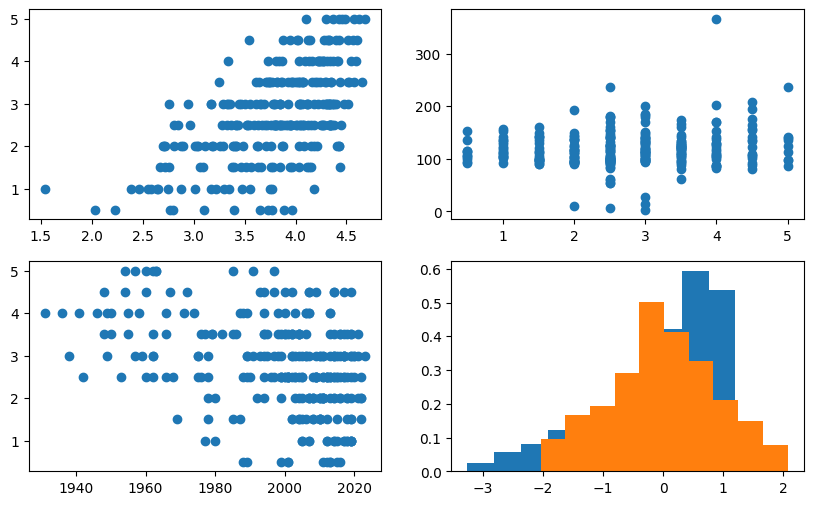

In [80]:
import matplotlib.pyplot as plt
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10,6))
ax1.scatter(database.Avr_Rating,database.Rating)
ax2.scatter(database.Rating,database.Duration)
ax3.scatter(database.Year,database.Rating)
norm_x = lambda x: (x - x.mean())/x.std()
ax4.hist(norm_x(database.Year),density=True)
ax4.hist(norm_x(database.Rating),density=True)


plt.show()

In [7]:
import pandas as pd
database = pd.read_csv('data_movies.csv', index_col=0)

In [12]:
import numpy as np
A = np.matrix([[1,0],[33,0]])
np.dot(A,A)

matrix([[ 1,  0],
        [33,  0]])

In [4]:
import requests
from bs4 import BeautifulSoup
import re
from numpy import NaN
import pandas as pd


pattern_rss = [r'>.*,',r'\b\d{4}\b',r'>.*<']


rss='https://letterboxd.com/GabrielCooutin/rss'
req = requests.get(rss)
soup = BeautifulSoup(req.content, features='xml')
list_title = []
list_link = []
list_rewatch = []
for item in soup.find_all('item'):
    try: 
        title = re.findall(pattern_rss[0], str(item.find('title')))[0][1:-1]
    except IndexError as exception:
        title = NaN
    try: 
        rewatched = re.findall(pattern_rss[2], str(item.find('letterboxd:rewatch')))[0][1:-1]
    except IndexError as exception:
        rewatched = NaN
    try:
        url = re.findall(pattern_rss[2], str(item.find('link')))[0][1:-1]
        req_url = requests.get(url)
        soup = BeautifulSoup(req_url.content,'html')
        film = soup.find_all('span', {'class':'film-title-wrapper'})[0].find('a')
        movie_link = 'letterboxd' + re.findall(r'".*"', str(film))[0][1:-1]
    except IndexError as exception:
        print(exception)
    list_title.append(title)
    list_link.append(movie_link)
    list_rewatch.append(rewatched)
new_data = pd.DataFrame([list_title,list_link,list_rewatch],index=['Name','Letterboxd URI','Rewatched']).T

# extract_data(new_data)



In [32]:
new_data.Name[(~new_data.Name.isin(database.Name))].index
new_data.Name[(new_data.Rewatched=='Yes')]

2                      8½
10    Catch Me If You Can
19               Hardcore
28      Linda Linda Linda
36                One Day
Name: Name, dtype: object